In [1]:
using Plots
using Statistics

In [3]:
plot();

# Zad 3

In [4]:
Γₜ(X,h)=sum((X[1:length(X)-abs(h)].-mean(X)) .* (X[abs(h)+1:end].-mean(X)))/length(X)

Γₜ (generic function with 1 method)

In [5]:
N(;μ=0,σ=2,n=1e3)=σ.*[√(-2log(rand()))*cos(2π*rand()) for _ in 1:n].+μ

N (generic function with 1 method)

In [6]:
Γ(X)=h->Γₜ(X,h)

Γ (generic function with 1 method)

In [7]:
Ns=[50,1e2,1e3]
γ=[Γ(N(n=i)) for i in Ns]

3-element Vector{var"#4#5"{Vector{Float64}}}:
 #4 (generic function with 1 method)
 #4 (generic function with 1 method)
 #4 (generic function with 1 method)

In [8]:
ρ(h,γ)=γ(h)/γ(0)

ρ (generic function with 1 method)

In [9]:
γ[1](0),γ[2](0),γ[3](0)

(3.661547933656857, 4.433591103656047, 4.138425411491395)

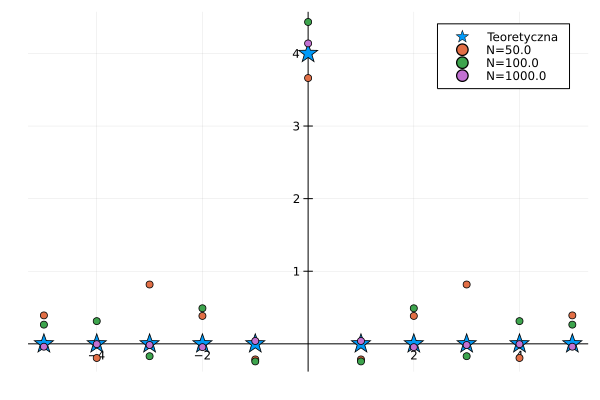

In [10]:
scatter(-5:5,[0,0,0,0,0,4,0,0,0,0,0],shape=:star,markersize=10, label="Teoretyczna")
for i in 1:3
    scatter!(-5:5,γ[i],label="N=$(Ns[i])")
end
scatter!(framestyle=:origin)

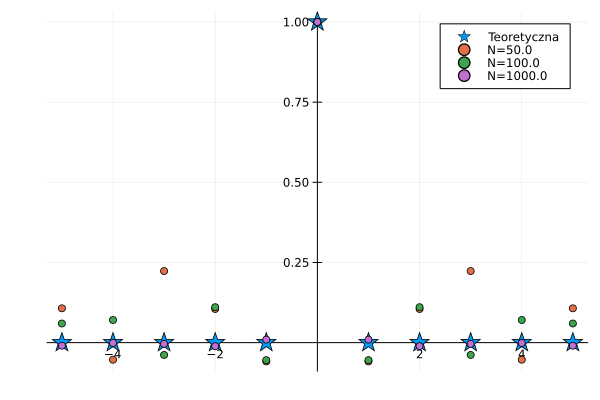

In [11]:
scatter(-5:5,[0,0,0,0,0,1,0,0,0,0,0],shape=:star,markersize=10, label="Teoretyczna")
for i in 1:3
    scatter!(-5:5,t->ρ(t,γ[i]),label="N=$(Ns[i])")
end
scatter!(framestyle=:origin)

## b)

In [12]:
teor(h)= h==1 ? 4 : 0

teor (generic function with 1 method)

In [13]:
ν(n, teor)=begin
    γ=Γ(N(n=n))
    sum(abs(γ(h)-teor(h)) for h in -(n-1):(n-1))/n
end
v(X, teor)=begin
    n=length(X)
    γ=Γ(X)
    sum(abs(γ(h)-teor(h)) for h in -(n-1):(n-1))/n
end

v (generic function with 1 method)

In [14]:
X=N(n=1e3);

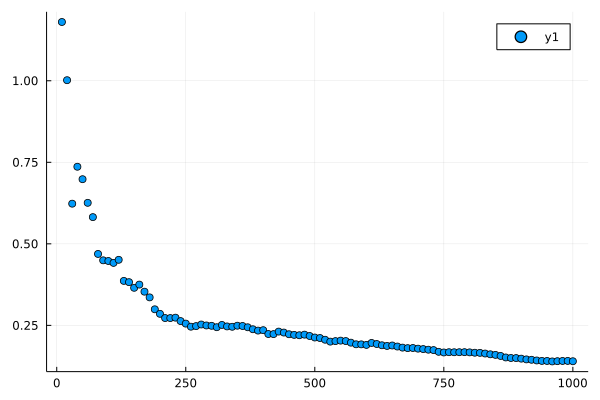

In [15]:
scatter(10:10:1000, n->v(X[1:n], teor))

# Zad 4

In [16]:
θ=3
σ=2
μ=0

0

In [17]:
X=N(n=1e4+1, μ=μ, σ=σ);

In [18]:
Y=X[2:end].+θ.*X[1:end-1];

In [19]:
γ=Γ(Y)

#4 (generic function with 1 method)

In [20]:
teor(h)= h==0 ? σ^2*(1+θ^2) : (h==1 ? σ^2*θ : 0)

teor (generic function with 1 method)

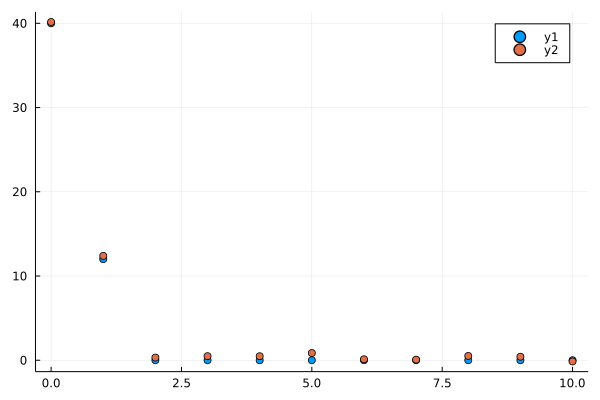

In [21]:
scatter(0:10, teor)
scatter!(0:10, γ)

# Zad 5

In [22]:
θ=3
σ=1
μ=0
a=1/3
p=1/7
n=Int(1e3)

1000

In [23]:
X=N(n=n+1, μ=μ, σ=σ);

In [24]:
Y=X[2:end].+θ.*X[1:end-1].+[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)];

In [25]:
γ=Γ(Y)

#4 (generic function with 1 method)

In [26]:
Ρₕ(X,h)=1/(length(X)-h)/(length(X)-h-1)*sum(sign( (X[i]-X[j])*(X[i+h]-X[j+h]) ) for i in 2:length(X)-h, j in 1:length(X)-h if j<i)

Ρₕ (generic function with 1 method)

In [27]:
Ρ(X)=h->Ρₕ(X,h)

Ρ (generic function with 1 method)

In [34]:
rho=Ρ(Y)

#22 (generic function with 1 method)

In [35]:
rho(0)

0.49999999999999994

In [47]:
Ρ₂ₕ(X,h)=1/(length(X)-h)*sum(sign( (X[i]-median(X))*(X[i+h]-median(X)) ) for i in 1:length(X)-h)
Ρ₂(X)=h->Ρ₂ₕ(X,h)

Ρ₂ (generic function with 1 method)

In [48]:
rho₂=Ρ₂(Y)

#30 (generic function with 1 method)

In [44]:
median([1,2,3,4,5])

3.0

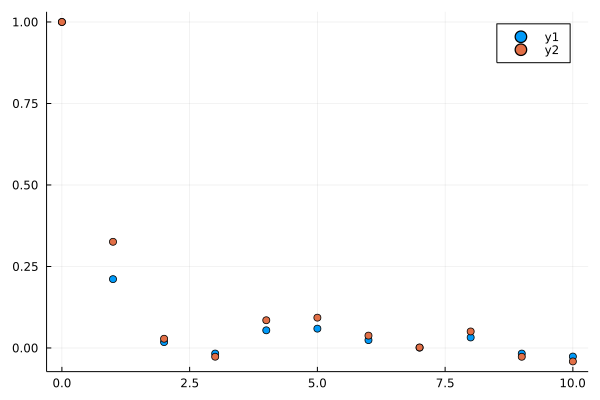

In [73]:
scatter(0:10, rho₂)
scatter!(0:10, t->sin(π/2*rho₂(t)))


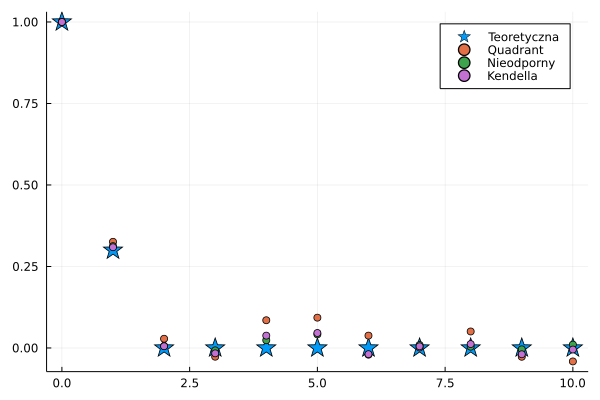

In [84]:
scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=10, label="Teoretyczna")
scatter!(0:10, t->sin(π/2*rho₂(t)), label="Quadrant")
scatter!(0:10,t->γ(t)/γ(0), label="Nieodporny")
scatter!(0:10, t->sin(π*rho(t)), label="Kendella")

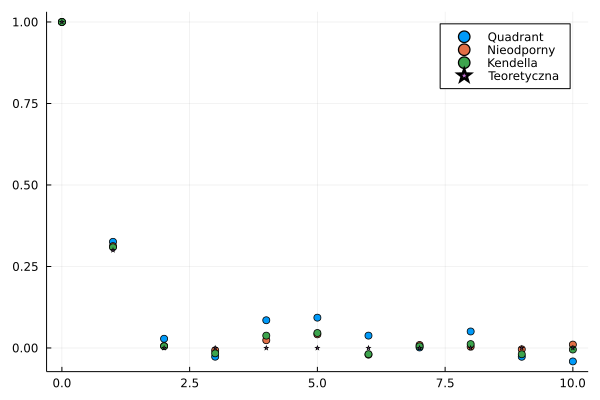

In [ ]:
θ=3
σ=1
μ=0
a=1/3
p=1/7
n=Int(1e3)

In [107]:
zad5(;p=1/7,a=1/3,θ=3,μ=0,σ=1,n=1000)=begin
    
    Xₜₑₘₚ=N(n=n+1, μ=μ, σ=σ);
    err=[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)]
    X=Xₜₑₘₚ[2:end]-θ.*Xₜₑₘₚ[1:end-1]
    Y=X+err
    γₓ=Γ(X)
    γ=Γ(Y)
    ρₓ₁=Ρ(X)
    ρₓ₂=Ρ₂(X)
    ρ₁=Ρ(Y)
    ρ₂=Ρ₂(Y)
    
    plt=[histogram(err, label="Błąd")]
    plt11=scatter(X, leg=false)
    plt21=scatter(Y, leg=false)
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=10, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρₓ₂(t)), label="Quadrant")
    scatter!(0:10,t->γₓ(t)/γ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρₓ₁(t)), label="Kendella")
    plt12=plot!()
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=10, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρ₂(t)), label="Quadrant")
    scatter!(0:10,t->γ(t)/γ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρ₁(t)), label="Kendella")
    plt22=plot!()
    plot(plt11, plt12, plt21, plt22, layout=(2,2), legend=false)
    append!(plt,plot!())
    plt
end

zad5 (generic function with 1 method)

In [108]:
zad5()

LoadError: MethodError: no method matching iterate(::Plots.Plot{Plots.GRBackend})
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at C:\Users\Kacper\AppData\Local\Programs\julia-1.7.2\share\julia\base\range.jl:826
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at C:\Users\Kacper\AppData\Local\Programs\julia-1.7.2\share\julia\base\range.jl:826
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at C:\Users\Kacper\AppData\Local\Programs\julia-1.7.2\share\julia\base\dict.jl:695
[0m  ...

In [173]:
zad5(;p=1/7,a=1/3,θ=3,μ=0,σ=1,n=1000)=begin
    
    Xₜₑₘₚ=N(n=n+1, μ=μ, σ=σ);
    err=[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)]
    X=Xₜₑₘₚ[2:end]+θ.*Xₜₑₘₚ[1:end-1]
    Y=X+err
    γₓ=Γ(X)
    γ=Γ(Y)
    ρₓ₁=Ρ(X)
    ρₓ₂=Ρ₂(X)
    ρ₁=Ρ(Y)
    ρ₂=Ρ₂(Y)
    
    pltₑ=histogram(err, label="Błąd")
    plt11=scatter(X, leg=false)
    plt21=scatter(Y, leg=false)
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=5, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρₓ₂(t)), label="Quadrant")
    scatter!(0:10,t->γₓ(t)/γₓ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρₓ₁(t)), label="Kendella")
    plt12=plot!()
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=5, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρ₂(t)), label="Quadrant")
    scatter!(0:10,t->γ(t)/γ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρ₁(t)), label="Kendella")
    plt22=plot!()
    plot(plt11, plt12, plt21, plt22, layout=(2,2))
    plot!(),pltₑ
end

zad5 (generic function with 1 method)

In [178]:
zad5(a=200)

(Plot{Plots.GRBackend() n=10}, Plot{Plots.GRBackend() n=1})

In [179]:
plt=ans

(Plot{Plots.GRBackend() n=10}, Plot{Plots.GRBackend() n=1})

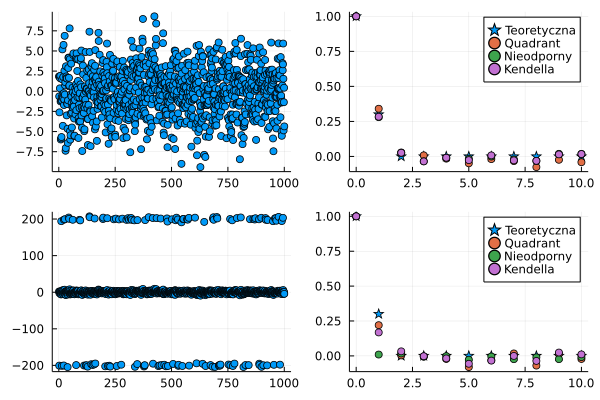

In [180]:
plt[1]

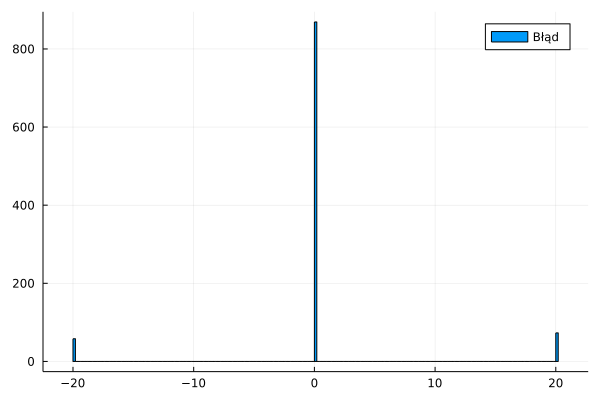

In [177]:
plt[2]